<a href="https://colab.research.google.com/github/Seavleu/Supervise_Unsupervise-Learning/blob/main/seoul_bike_demand_SuperviseLearning_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
Assumption:
- Linearity: does our data follow the pattern?
, independance, normality, nomoskedasticity

Predicting the output from the continous data

Key takeaway: Residual/Error |yi - yi^|: sum the error and try to decrease them

MAE: sum all the error then divided how many data point we have to get the average
MSE
RMSE  
R^2-coeff of determination
RSS
TSS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

# Dataset

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

**Variable Information**
- Date : year-month-day
- Rented Bike count - Count of bikes rented at each hour
- Hour - Hour of he day
- Temperature-Temperature in Celsius
- Humidity - %
- Windspeed - m/s
- Visibility - 10m
- Dew point temperature - Celsius
- Solar radiation - MJ/m2
- Rainfall - mm
- Snowfall - cm
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Citation**
Seoul Bike Sharing Demand. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.

In [ ]:
cols = ['bike_counts', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'rediation', 'rain', 'snow', 'functional']
df= pd.read_csv('/content/drive/MyDrive/Machine Learning 2024/Datasets/SeoulBikeData - SeoulBikeData.csv').drop(['Date', 'Holiday', 'Seasons'],axis =1)

In [ ]:
df.columns = cols
df['functional'] = (df['functional'] == 'Yes').astype(int)
df = df[df['hour'] == 12]
df = df.drop(['hour'], axis=1)

In [ ]:
df.head()

,bike_counts,temp,humidity,wind,visibility,dew_pt_temp,rediation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


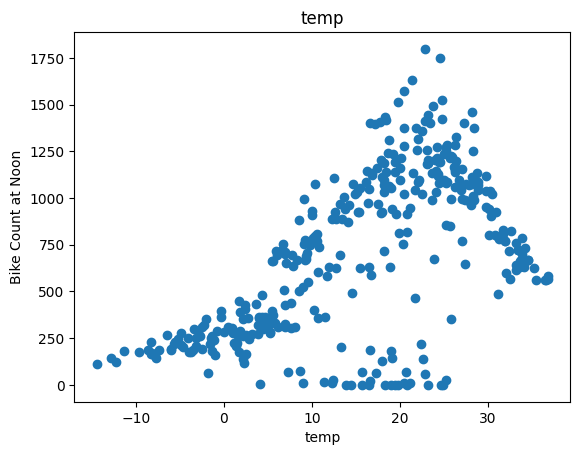

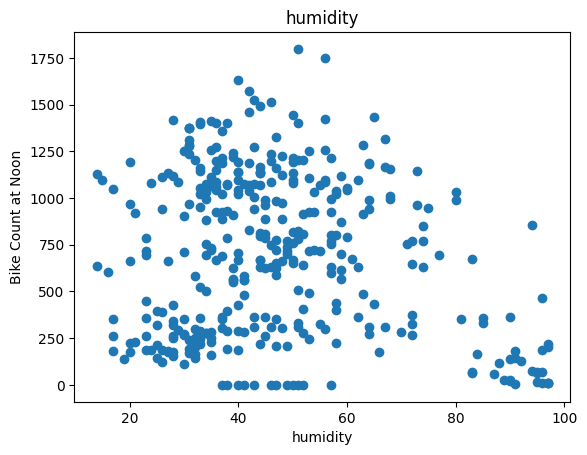

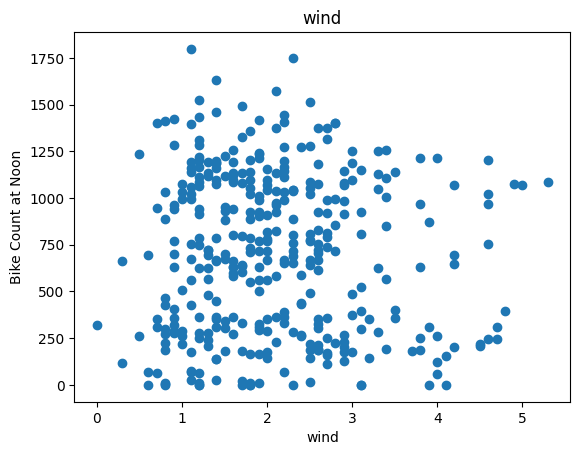

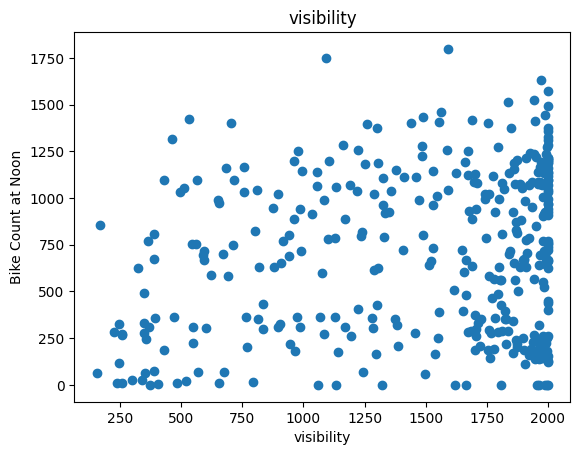

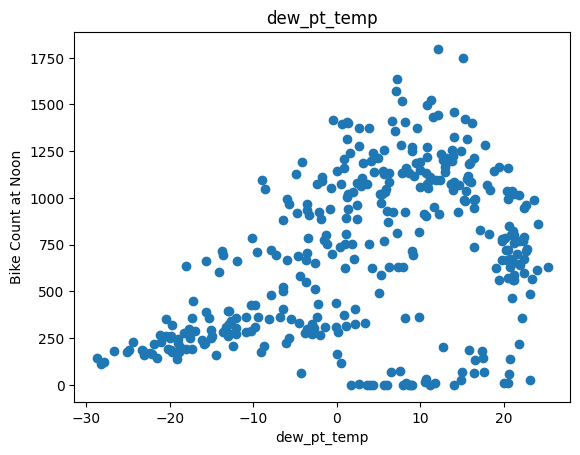

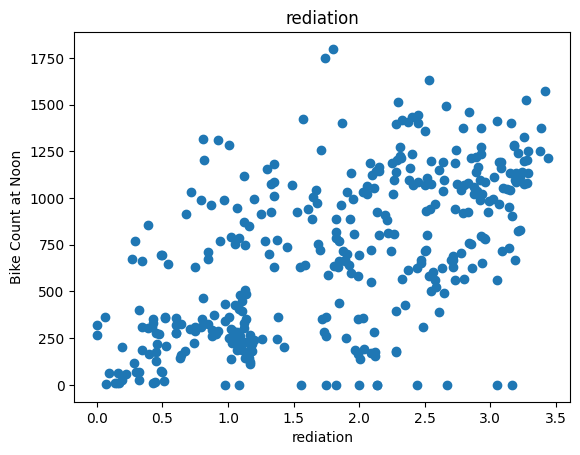

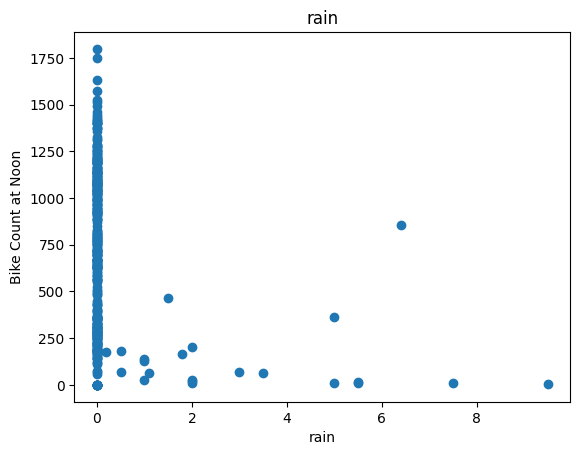

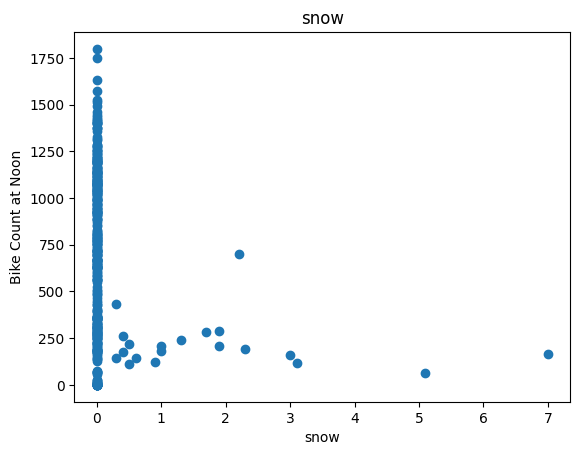

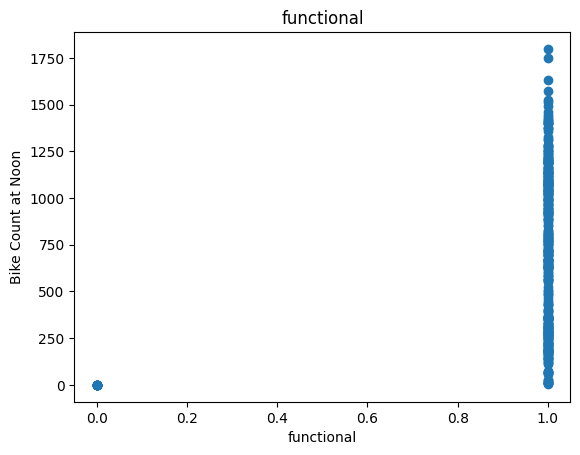

In [ ]:
# Plot to see how it effect the bike count
for label in df.columns[1:]:
  plt.scatter(df[label], df['bike_counts'])
  plt.title (label)
  plt.ylabel('Bike Count at Noon')
  plt.xlabel(label)

  plt.show()


In [ ]:
df = df.drop(['wind', 'visibility', 'functional'], axis = 1)

In [ ]:
df.head()

,bike_counts,temp,humidity,dew_pt_temp,rediation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train, Valid, Test

In [ ]:
train, val, test = np.split(df.sample(frac=1), [int (0.6*len(df)), int(0.8*len(df))])

In [ ]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if not x_labels:
        X = dataframe[[c for c in dataframe.columns if c != y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))

    return data, X, y

In [ ]:
x_labels_temp = ['temp']  # Replace with your actual list of features
data_train, X_train_temp, y_train_temp = get_xy(train, "bike_counts", x_labels_temp)
data_val, X_val_temp, y_val_temp = get_xy(val, "bike_counts", x_labels_temp)
data_test, X_test_temp, y_test_temp = get_xy(test, "bike_counts", x_labels_temp)

In [ ]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

print(temp_reg.coef_, temp_reg.intercept_)

[[20.69310402]] [392.20805425]


In [ ]:
temp_reg.score(X_test_temp, y_test_temp)

0.24214756708178875

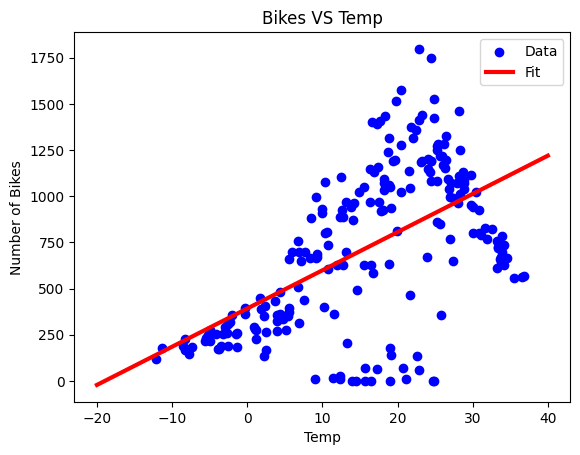

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
y_pred = temp_reg.predict(x.numpy().reshape(-1, 1))  # Use numpy() to convert tensor to numpy array
plt.plot(x, y_pred, label='Fit', color='red', linewidth=3)
plt.legend()
plt.title('Bikes VS Temp')
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

# Multilinear Regression

In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])  # Added closing parenthesis
data_train, X_train_all, y_train_all = get_xy(train, "bike_counts", x_labels_temp)
data_val, X_val_all, y_val_all = get_xy(val, "bike_counts", x_labels_temp)
data_test, X_test_all, y_test_all = get_xy(test, "bike_counts", x_labels_temp)


In [ ]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all )

LinearRegression()

In [ ]:
all_reg.score(X_test_all, y_test_all)

0.31855818185592455

# Regression with Neural Net

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [ ]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [ ]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'], label ='val_loss')
  plt.set_xlabel('Epoch')
  plt.set_ylabel('MSE')
  plt.legend()
  plt.grid(True)

In [ ]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose = 0,
    epochs = 1000,
    validation_data = (X_val_temp, y_val_temp)
)

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

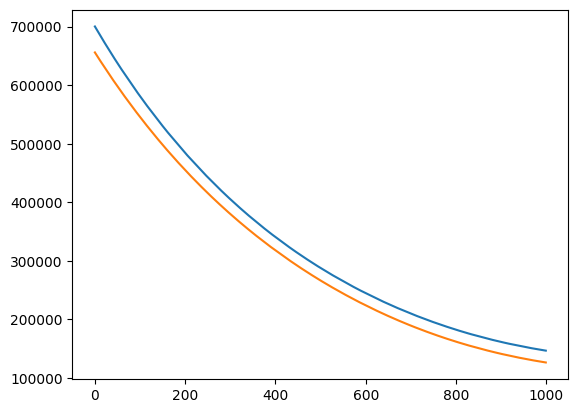

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 2ms/step


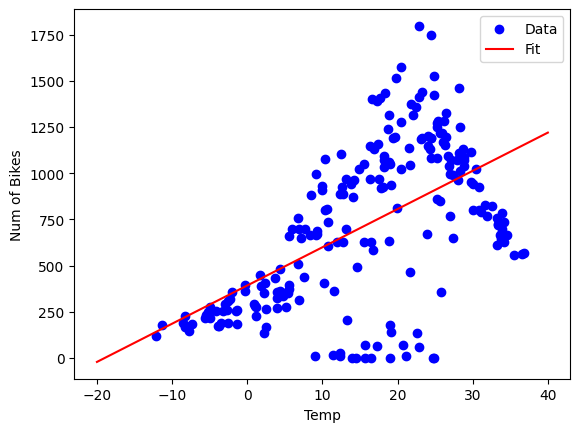

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label= "Data", color="blue")
x =tf.linspace(-20, 40,100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label='Fit',color= 'red')
plt.ylabel('Num of Bikes')
plt.xlabel('Temp')
plt.legend()
plt.show()

# NN

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
history = nn_model.fit(
    X_train_temp,
    y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    verbose = 0, epochs= 100)

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

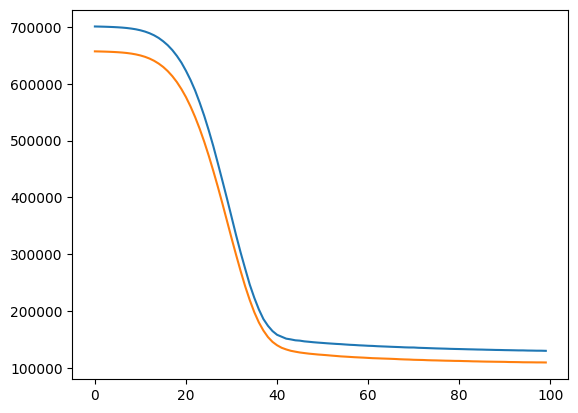

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 2ms/step


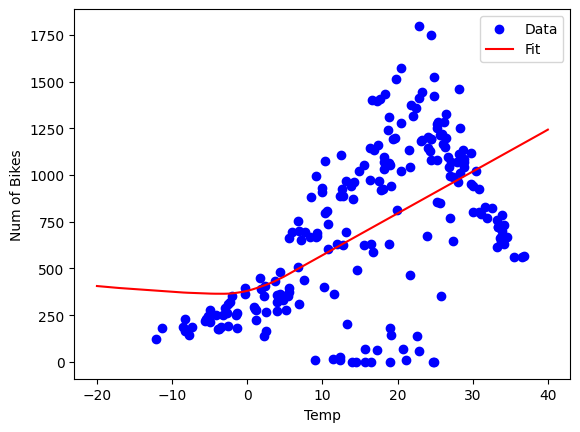

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label= "Data", color="blue")
x =tf.linspace(-20, 40,100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label='Fit',color= 'red')
plt.ylabel('Num of Bikes')
plt.xlabel('Temp')
plt.legend()
plt.show()

In [ ]:
# calculate the MSE for both linear reg and nn
# y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_temp)
